In [66]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Loading the Data

In [67]:
dataset = pd.read_csv("data\googleplaystore.csv")
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Data Exploration and Visualization
- Data Exploration and visualization has been done in detail in Milestone 2
- The results of that exploration will be used here to clean the Data and prepare it for modeling

# Data Cleaning

In [68]:
def sizes_to_int(size):
    if 'M' in size:
        return np.float32(size.split('M')[0])* (10**6)
    elif 'k' in size:
        return np.float32(size.split('k')[0])* (10**3)
    elif '+' in size:
        dig1 = size.split(',')[0]
        rest = size.split(',')[1]
        dig2 = rest.split('+')[0]
        return np.float32(dig1+dig2)
    else:
        return -1

In [69]:
def installs_to_int(install):
    if install == 'Free':
        return 0
    install = install.replace(',', '')
    install = install.replace('+', '')
    return np.int64(install)

In [70]:
def price_tonumerical(price):
    if '$' in price:
        return np.float32(price.replace('$', ''))
    else:
        return 0.0

In [71]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.drop(dataset.loc[dataset['Category'] == '1.9'].index, inplace=True)
dataset['Reviews'].loc[dataset['Reviews'] == '3.0M'] = '3000000'
dataset['Reviews'] = dataset['Reviews'].astype(np.int64)
dataset['Size'] = dataset['Size'].apply(sizes_to_int).astype(np.int64)
size_mean = dataset['Size'].loc[dataset['Size'] != -1].mean()
dataset['Size'].loc[dataset['Size'] == -1] = np.int32(size_mean)
dataset['Installs'].loc[dataset['Installs'] == 'Free'] = '0'
dataset['Installs'] = dataset['Installs'].apply(installs_to_int)
dataset['Price'] = dataset['Price'].apply(price_tonumerical)


C:\Users\User\AppData\Local\Temp\ipykernel_21176\734070386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Reviews'].loc[dataset['Reviews'] == '3.0M'] = '3000000'
C:\Users\User\AppData\Local\Temp\ipykernel_21176\734070386.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Size'].loc[dataset['Size'] == -1] = np.int32(size_mean)
C:\Users\User\AppData\Local\Temp\ipykernel_21176\734070386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [72]:
dataset = dataset[['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']]
dataset.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510,8699999,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,4.3,967,2799999,100000,Free,0.0,Everyone


# Data Preprocessing

In [73]:
def one_hot_encode_column(column):
    data = list(column.unique())
    data = [np.zeros() for i, x in enumerate(data)]
    

In [74]:
X_data = pd.get_dummies(dataset, columns=['Category', 'Type', 'Content Rating' ], drop_first=False)
X_data.head()

Y_data = X_data.pop('Installs')
# Y_data = X_data[['Installs_1',
#        'Installs_5', 'Installs_10', 'Installs_50', 'Installs_100',
#        'Installs_500', 'Installs_1000', 'Installs_5000', 'Installs_10000',
#        'Installs_50000', 'Installs_100000', 'Installs_500000',
#        'Installs_1000000', 'Installs_5000000', 'Installs_10000000',
#        'Installs_50000000', 'Installs_100000000', 'Installs_500000000',
#        'Installs_1000000000']]

# X_data = X_data.drop(['Installs_1',
#        'Installs_5', 'Installs_10', 'Installs_50', 'Installs_100',
#        'Installs_500', 'Installs_1000', 'Installs_5000', 'Installs_10000',
#        'Installs_50000', 'Installs_100000', 'Installs_500000',
#        'Installs_1000000', 'Installs_5000000', 'Installs_10000000',
#        'Installs_50000000', 'Installs_100000000', 'Installs_500000000',
#        'Installs_1000000000'], axis=1)

In [75]:
X_cols = X_data.columns
X_data.head()

,Rating,Reviews,Size,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8699999,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2799999,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [76]:
Y_cols = Y_data.unique()
Y_data.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [88]:
len(Y_cols)

19

# Modeling
- We will be using a Decision Tree as it is a non parametric statistical prediction model
### Advantages: 


# Preparing Data

In [77]:
X_data_np = X_data.to_numpy()
Y_data_np = Y_data.to_numpy()

### Normalizing and stabdarizing

In [78]:
# X_data = Normalizer().fit_transform(X_data)
# X_data = StandardScaler().fit_transform(X_data)

In [79]:
print(X_data_np[0])

[4.10e+00 1.59e+02 1.90e+07 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data_np, Y_data_np, test_size=0.2, random_state=42)

In [81]:
print(X_train.shape)
print(Y_train.shape)

(7108, 45)
(7108,)


# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [83]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=20)

In [84]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\User\AppData\Local\Temp\ipykernel_21176\813742034.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


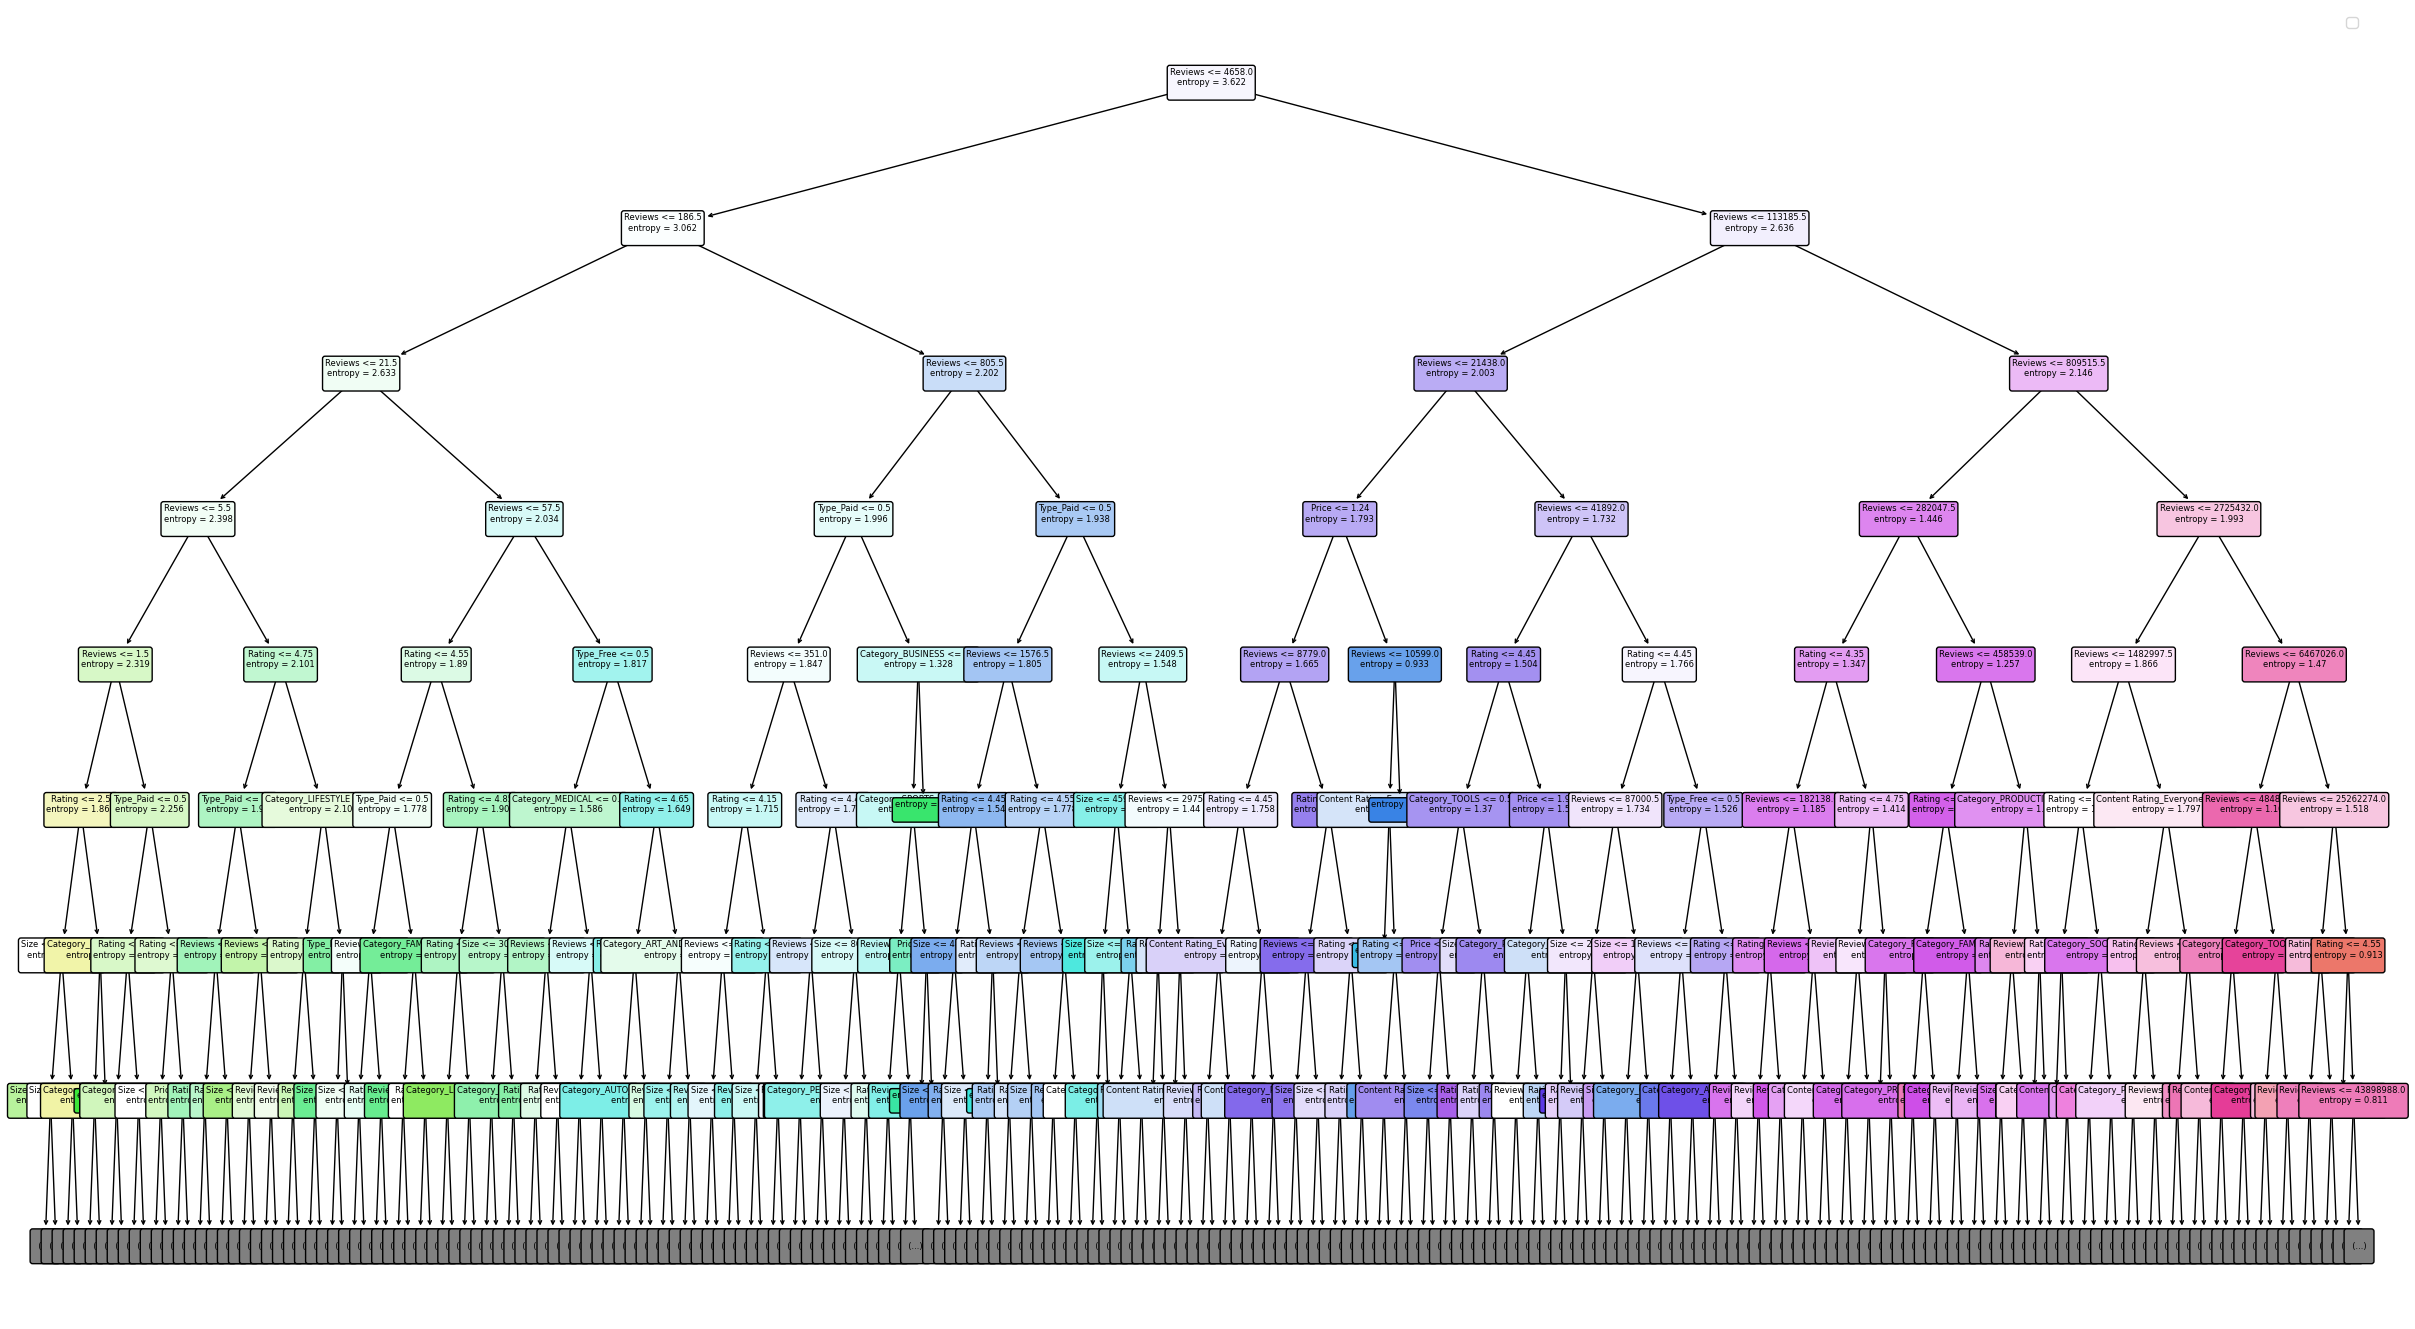

In [92]:
import matplotlib
import re

fig, axs = plt.subplots(figsize=(30, 17))
plot_tree(tree, feature_names=list(X_cols), class_names=list(str(Y_cols)), impurity=True, filled=True, fontsize=6, rounded=True, max_depth=7, ax=axs)

def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("samples[^$]*","",txt)
        obj.set_text(txt)
    return obj
    
axs.properties()['children'] = [replace_text(i) for i in axs.properties()['children']]
plt.legend()
fig.show()


# print(axs.properties()['children'])

In [89]:
Y_predict = tree.predict(X_test)

### Evaluation

In [90]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

acc = accuracy_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict, average='macro')
recall = recall_score(Y_test, Y_predict, average='macro')
precision = precision_score(Y_test, Y_predict, average='macro')


print(acc)
print(f1)
print(recall)
print(precision)

0.5084364454443194
0.43477793550591987
0.4530393345436644
0.4238340035488029


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Coorelation Heatmap

In [63]:
X_data[['Price', 'Size', 'Reviews', 'Rating']]

,Price,Size,Reviews,Rating
0,0.0,19000000,159,4.1
1,0.0,14000000,967,3.9
2,0.0,8699999,87510,4.7
3,0.0,25000000,215644,4.5
4,0.0,2799999,967,4.3
...,...,...,...,...
10834,0.0,2599999,7,4.0
10836,0.0,53000000,38,4.5
10837,0.0,3599999,4,5.0
10839,0.0,22760828,114,4.5


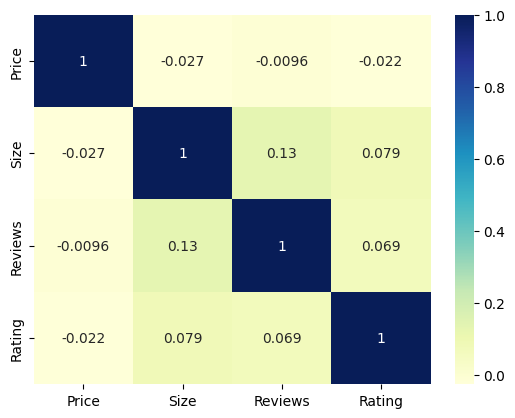

In [64]:
import seaborn as sb

dataplot = sb.heatmap(X_data[['Price', 'Size', 'Reviews', 'Rating']].corr(), cmap="YlGnBu", annot=True) 

plt.show()

# Random Forests

In [119]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=20)
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20)

In [120]:
Y_predict = forest.predict(X_test)

In [121]:
acc = accuracy_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict, average='macro')
recall = recall_score(Y_test, Y_predict, average='macro')
precision = precision_score(Y_test, Y_predict, average='macro')


print(acc)
print(f1)
print(recall)
print(precision)

0.5736782902137233
0.4845048491514453
0.47643326264065616
0.5393353138552167


# Neural Network

In [31]:
from keras.models import Model
import keras.layers as kl


In [32]:
X_data = Normalizer().fit_transform(X_data)
X_data = StandardScaler().fit_transform(X_data)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

def create_model(input_shape = (45,)):
    inputs = kl.Input(shape=input_shape)

    dense1 = kl.Dense(units=512, activation="relu")(inputs)
    norm1 = kl.Dropout(rate=0.3)(dense1)
    dense1 = kl.Dense(units=512, activation="relu")(dense1)
    norm1 = kl.Dropout(rate=0.3)(dense1)
    dense2 = kl.Dense(units=128, activation="relu")(norm1)
    drop2 = kl.Dropout(rate=0.2)(dense2)
    dense2 = kl.Dense(units=32, activation="relu")(norm1)
    drop2 = kl.Dropout(rate=0.2)(dense2)
    outputs = kl.Dense(units=19, activation="softmax")(drop2)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

    return model

In [33]:
model = create_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_5 (Dense)             (None, 512)               23552     
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                16416     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 19)                627 

In [36]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
178/178 [==============================] - 1s 5ms/step - loss: 1.7351 - accuracy: 0.3618 - val_loss: 1.7187 - val_accuracy: 0.3594
Epoch 2/20
178/178 [==============================] - 1s 5ms/step - loss: 1.7279 - accuracy: 0.3618 - val_loss: 1.7477 - val_accuracy: 0.3657
Epoch 3/20
178/178 [==============================] - 1s 5ms/step - loss: 1.7313 - accuracy: 0.3649 - val_loss: 1.7061 - val_accuracy: 0.3664
Epoch 4/20
178/178 [==============================] - 1s 5ms/step - loss: 1.7000 - accuracy: 0.3785 - val_loss: 1.7352 - val_accuracy: 0.3720
Epoch 5/20
178/178 [==============================] - 1s 5ms/step - loss: 1.7009 - accuracy: 0.3778 - val_loss: 1.6829 - val_accuracy: 0.3762
Epoch 6/20
178/178 [==============================] - 1s 5ms/step - loss: 1.6866 - accuracy: 0.3811 - val_loss: 1.7192 - val_accuracy: 0.3657
Epoch 7/20
178/178 [==============================] - 1s 5ms/step - loss: 1.6779 - accuracy: 0.3888 - val_loss: 1.6944 - val_accuracy: 0.3692
Epoch 

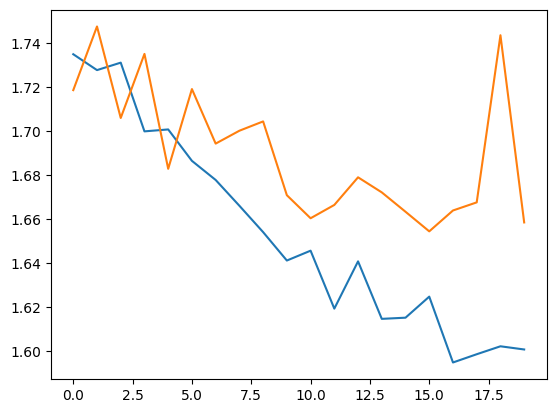

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()